# Jude Bellingham Pizza Plot

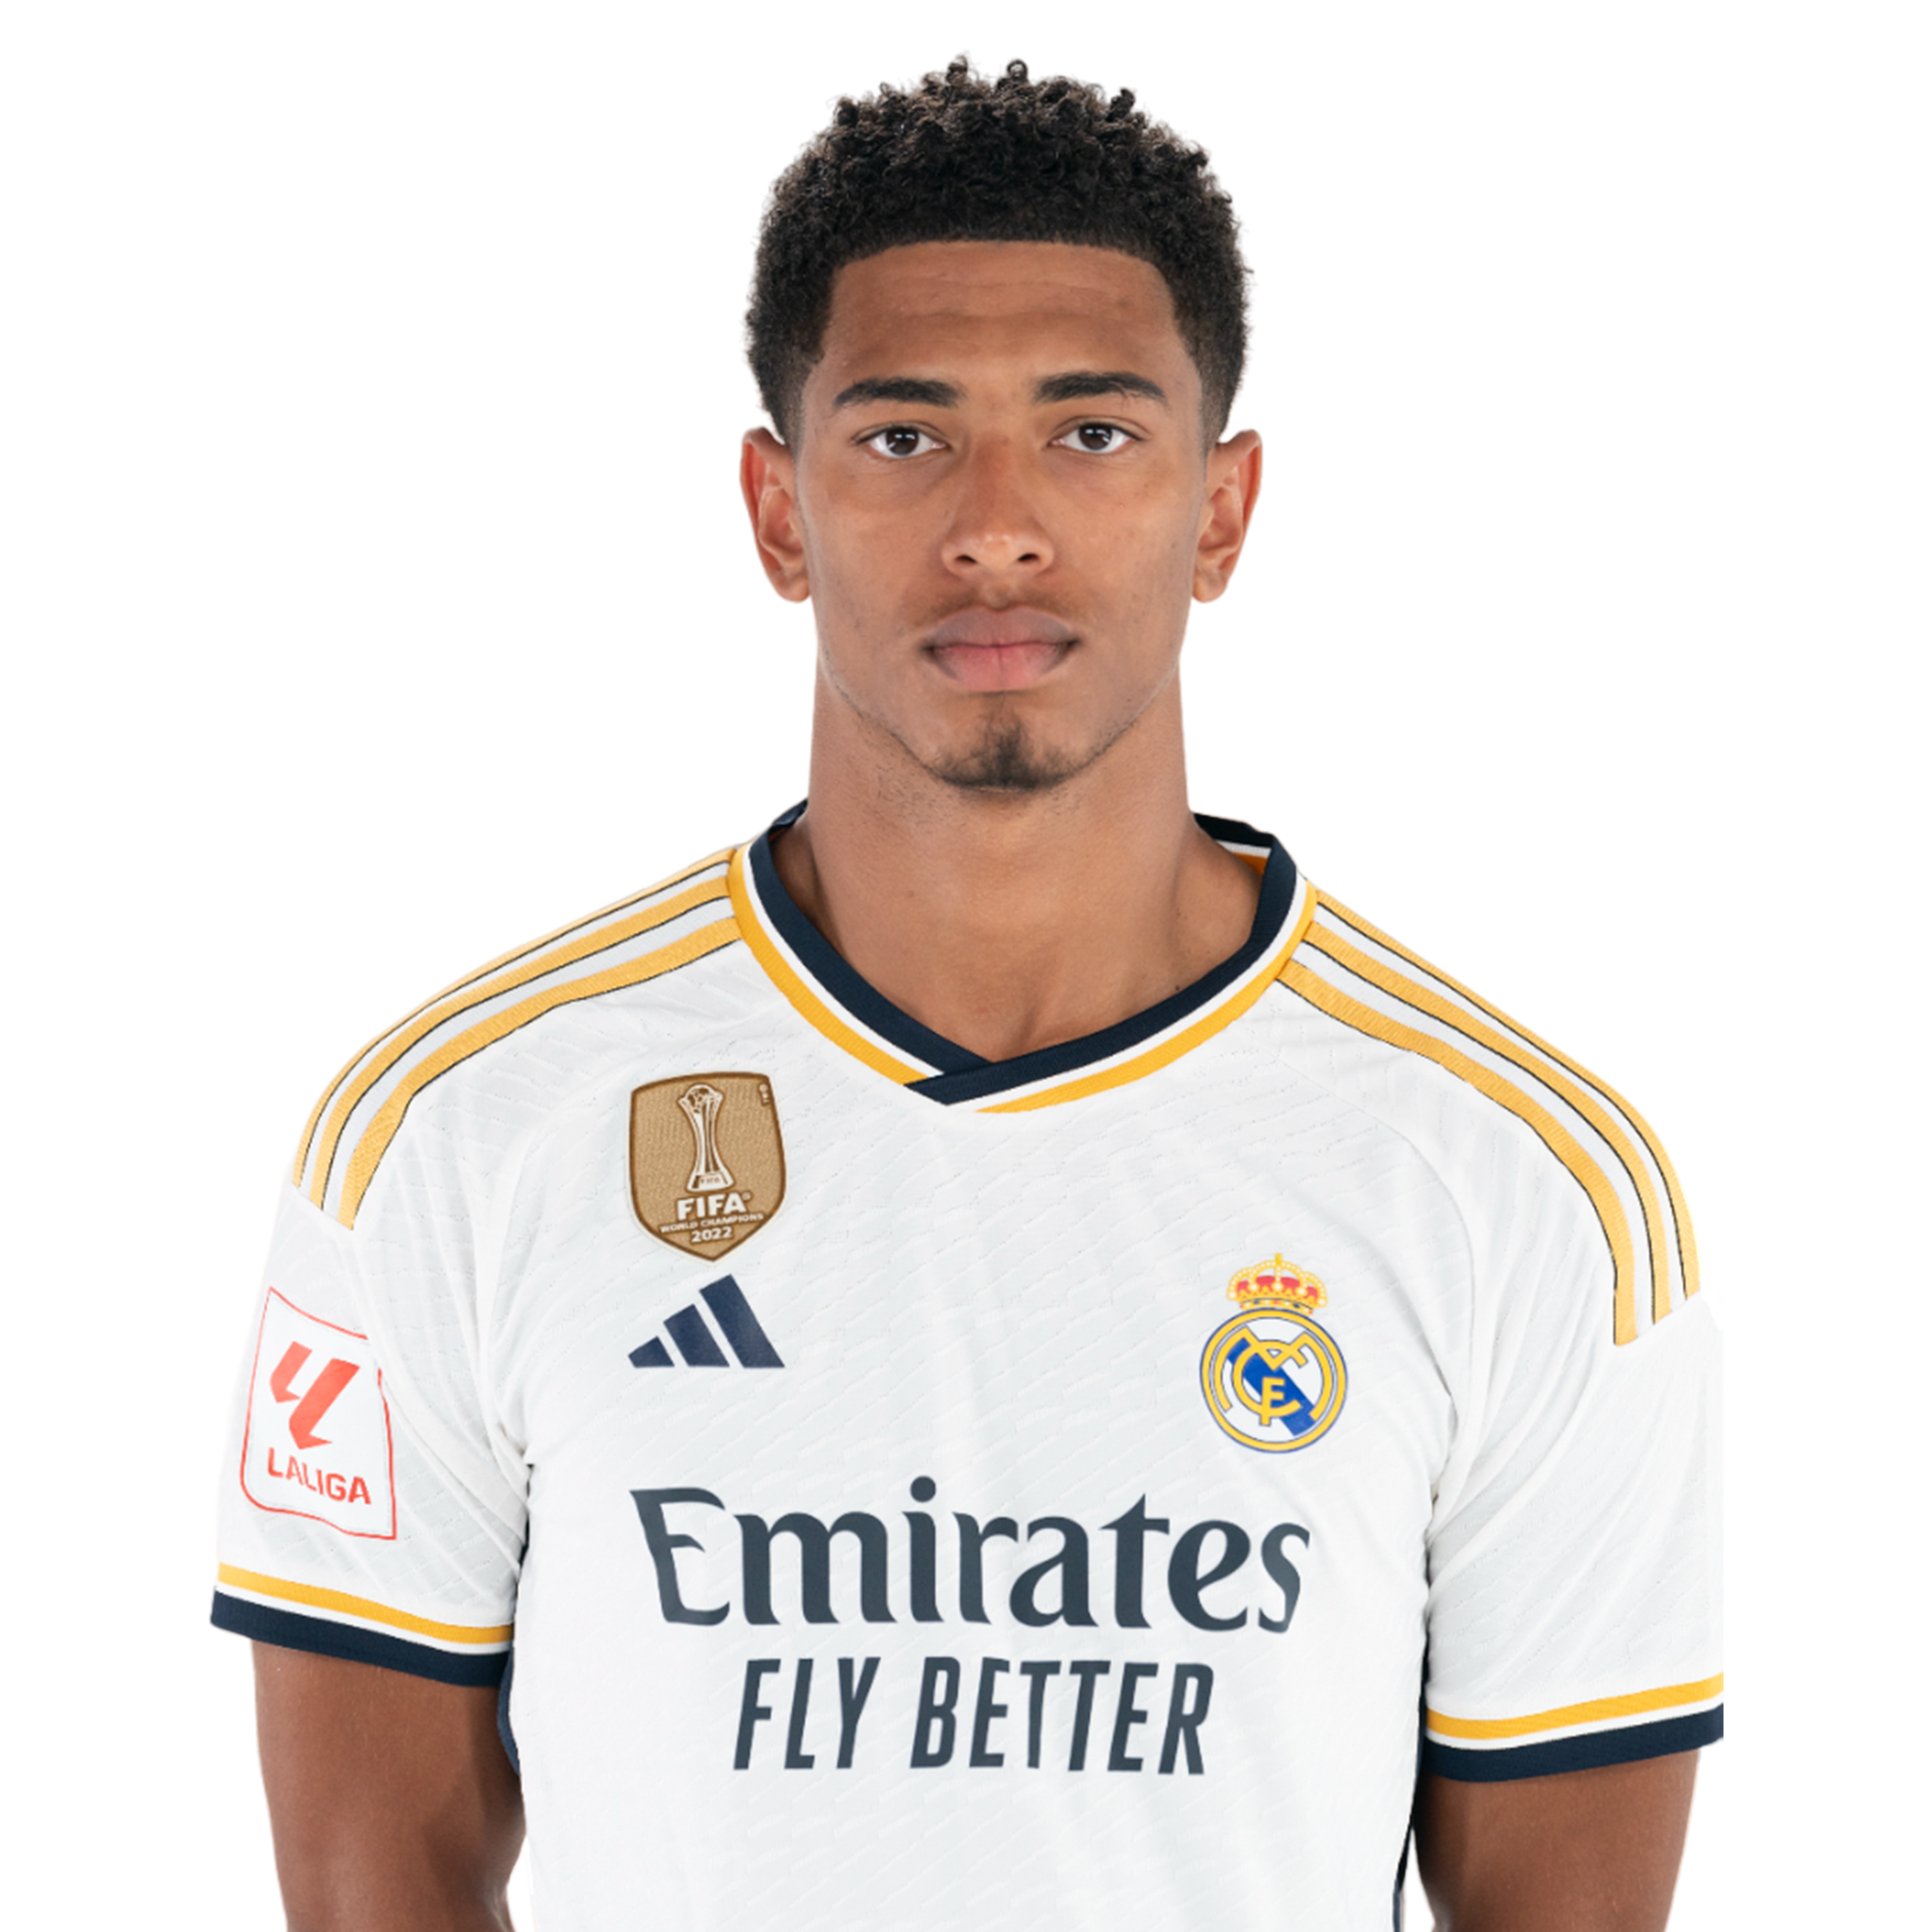

**Source**: *https://www.laliga.com/*

## Problem Statement

El objetivo de este proyecto es el desarrollo de un gráfico de percentiles del judador del Real Madrid CF, Jude Bellingham, comparado con los mediocampistas ofensivos y extremos de las 5 grandes ligas, UCL y UEL en los últimos 365 días; basado en 3131 minutos jugados.

## Data Collection

Para llevar a cabo este proyecto, se extraen los percentiles del judador del Real Madrid CF, Jude Bellingham, comparado con los mediocampistas ofensivos y extremos de las 5 grandes ligas, UCL y UEL en los últimos 365 días; basado en 3131 minutos jugados. Todos estos datos provienen de *FBref*.

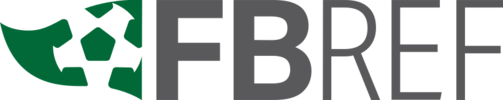

**Source:** *https://fbref.com/*

## Import Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from urllib.request import urlopen
from PIL import Image
from mplsoccer import PyPizza, add_image, FontManager

pd.options.display.max_columns=None
plt.rcParams['figure.dpi'] = 200

import warnings
warnings.filterwarnings('ignore')

## FBRef Scraping

In [2]:
html_url = 'https://fbref.com/en/players/57d88cf9/Jude-Bellingham'
bellingham_tables = pd.read_html(html_url)
len(bellingham_tables)

14

In [3]:
bellingham = bellingham_tables[1]
bellingham = bellingham.query('~Statistic.isna()').reset_index(drop=True)
bellingham['Per 90'] = bellingham['Per 90'].apply(lambda x: x.replace('%', ''))
bellingham['Per 90'] = bellingham['Per 90'].astype('float64')
bellingham['Percentile'] = bellingham['Percentile'].astype('int64')
bellingham

,Statistic,Per 90,Percentile
0,Non-Penalty Goals,0.43,92
1,Non-Penalty xG,0.28,76
2,Shots Total,2.13,54
3,Assists,0.17,48
4,xAG,0.15,29
5,npxG + xAG,0.42,57
6,Shot-Creating Actions,4.28,73
7,Passes Attempted,53.81,93
8,Pass Completion %,82.60,90
9,Progressive Passes,7.65,99


## Load fonts

In [4]:
font_normal = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/roboto/'
                          'Roboto%5Bwdth,wght%5D.ttf')

font_italic = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/roboto/'
                          'Roboto-Italic%5Bwdth,wght%5D.ttf')

font_bold = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
                        'RobotoSlab%5Bwght%5D.ttf')

## Load Image

In [5]:
URL = 'https://raw.githubusercontent.com/joaquinvictorias/Jude_Bellingham_Pizza_Plot/main/images/JudeBellingham.png'
im = Image.open(urlopen(URL))

## Pizza Plot

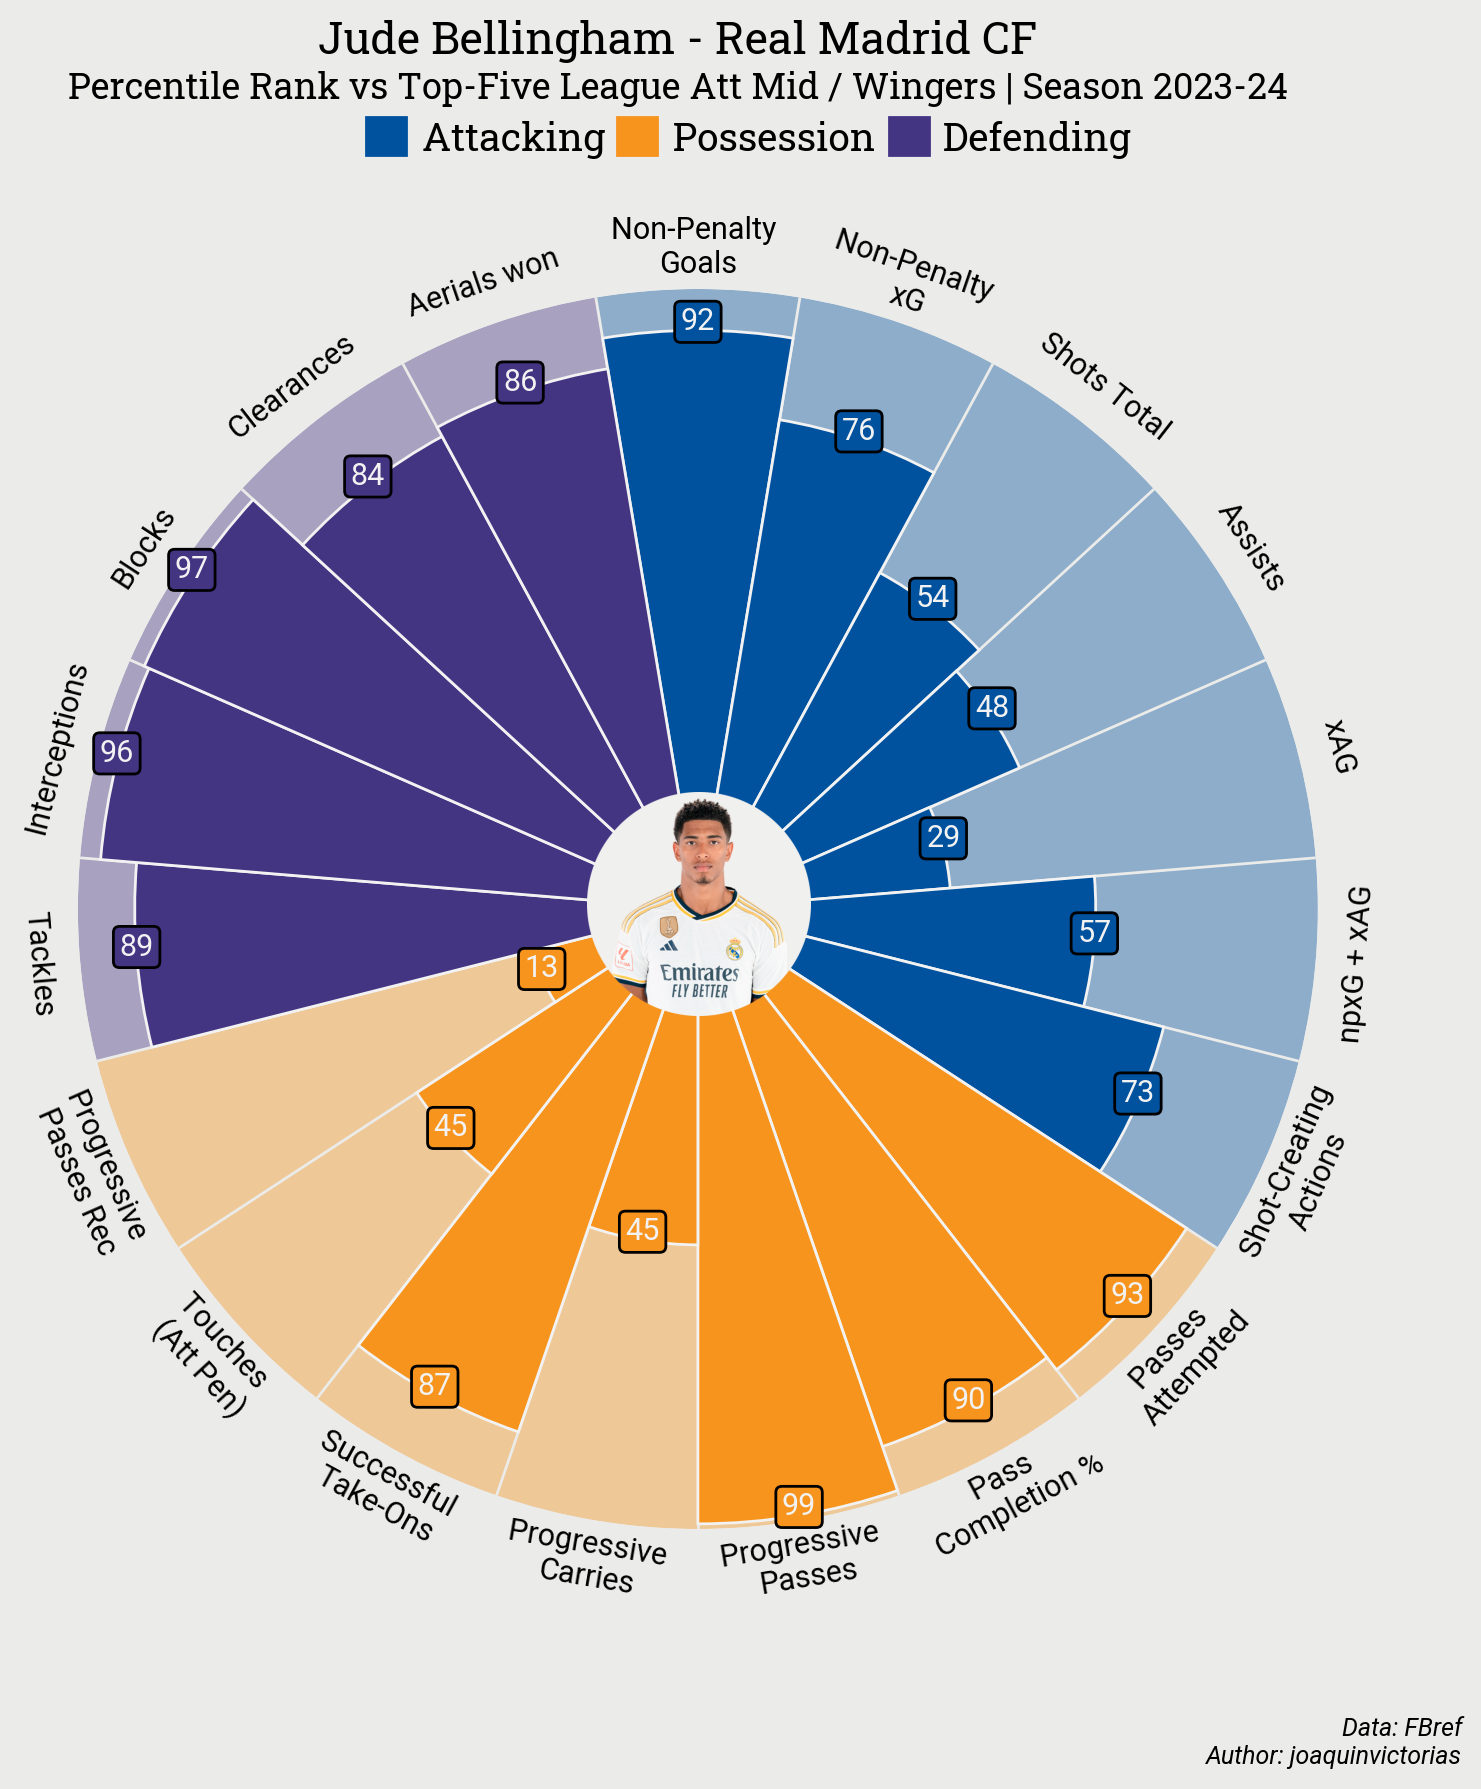

In [6]:
# parameter list
params = ['Non-Penalty \nGoals', 'Non-Penalty \nxG', 'Shots Total', 'Assists',
          'xAG', 'npxG + xAG', 'Shot-Creating \nActions', 'Passes \nAttempted',
          'Pass \nCompletion %', 'Progressive \nPasses', 'Progressive \nCarries',
          'Successful \nTake-Ons', 'Touches \n(Att Pen)',
          'Progressive \nPasses Rec', 'Tackles', 'Interceptions', 'Blocks',
          'Clearances', 'Aerials won']

# value list
values = list(bellingham['Percentile'].values)

# color for the slices and text
slice_colors = ['#00529F'] * 7 + ['#F7941E'] * 7 + ['#443583'] * 5
text_colors = ['#F2F2F2'] * 19

# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    background_color='#EBEBE9',     # background color
    straight_line_color='#EBEBE9',  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=0,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=20            # size of inner circle
)

# plot pizza
fig, ax = baker.make_pizza(
    values,                          # list of values
    figsize=(8, 9),                # adjust figsize according to your need
    color_blank_space='same',        # use same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor='#F2F2F2', zorder=2, linewidth=1
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color='#000000', fontsize=11,
        fontproperties=font_normal.prop, va='center'
    ),                               # values to be used when adding parameter
    kwargs_values=dict(
        color='#000000', fontsize=11,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor='#000000', facecolor='cornflowerblue',
            boxstyle='round', pad=0.2, lw=1
        )
    )                                # values to be used when adding parameter-values
)

# add title
fig.text(
    0.5, 0.97, 'Jude Bellingham - Real Madrid CF', size=16,
    ha='center', fontproperties=font_bold.prop, color='#000000'
)

# add subtitle
fig.text(
    0.5, 0.945,
    'Percentile Rank vs Top-Five League Att Mid / Wingers | Season 2023-24',
    size=13,
    ha='center', fontproperties=font_bold.prop, color='#000000'
)

# add credits
CREDIT_1 = 'Data: FBref'
CREDIT_2 = 'Author: joaquinvictorias'

fig.text(
    0.99, 0.02, f'{CREDIT_1}\n{CREDIT_2}', size=9,
    fontproperties=font_italic.prop, color='#000000',
    ha='right'
)

# add text
fig.text(
    0.34, 0.916, 'Attacking       Possession       Defending', size=14,
    fontproperties=font_bold.prop, color='#000000'
)

# add rectangles
fig.patches.extend([
    plt.Rectangle(
        (0.305, 0.914), 0.025, 0.021, fill=True, color='#00529F',
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.462, 0.914), 0.025, 0.021, fill=True, color='#F7941E',
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.632, 0.914), 0.025, 0.021, fill=True, color='#443583',
        transform=fig.transFigure, figure=fig
    ),
])

# add image
ax_image = add_image(
    im, fig, left=0.443, bottom=0.428, width=0.14, height=0.14
)   # these values might differ when you are plotting

plt.savefig('Bellingham.png')
plt.show()